In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import dataframe

In [2]:
nba_stats = pd.read_csv('../data/nba_later_eda.csv', index_col = [0])

# Label Stats

In [3]:
overall_stats = ['REB','AST', 'DD2', 'TD3', 'USG%', 'T_REB%',
          'T_AST%', 'PTS_TOV', 'BLK', 'T_BLKA%', 'AST_2FGM%', 'AST_3FGM%', 'STL', 'T_STL%',
                'FG%', 'FGA_2P%', 'T_FGA%', 'TOV', 'T_DREB%', 'T_OREB%', 'MP']

# KMEANS

In [4]:
X = nba_stats[overall_stats]
y = nba_stats['Player']

#scale data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#dimensionality reduction
pca = PCA(n_components = 5)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

#creating clusters
overall = KMeans(n_clusters = 3,random_state= 248)
overall.fit(X_pca)
y_kmeans = overall.predict(X_pca)
nba_stats['overall_kmean'] = overall.labels_
overall_sil = silhouette_score(X_sc, overall.labels_)
silhouette_score(X_sc, overall.labels_)

Cumulative Explained Variance: 0.7688103441627845


0.2542616267664462

In [5]:
overall_cluster0 = nba_stats[nba_stats['overall_kmean'] == 0]
overall_cluster1 = nba_stats[nba_stats['overall_kmean'] == 1]
overall_cluster2 = nba_stats[nba_stats['overall_kmean'] == 2]

# Boxplots

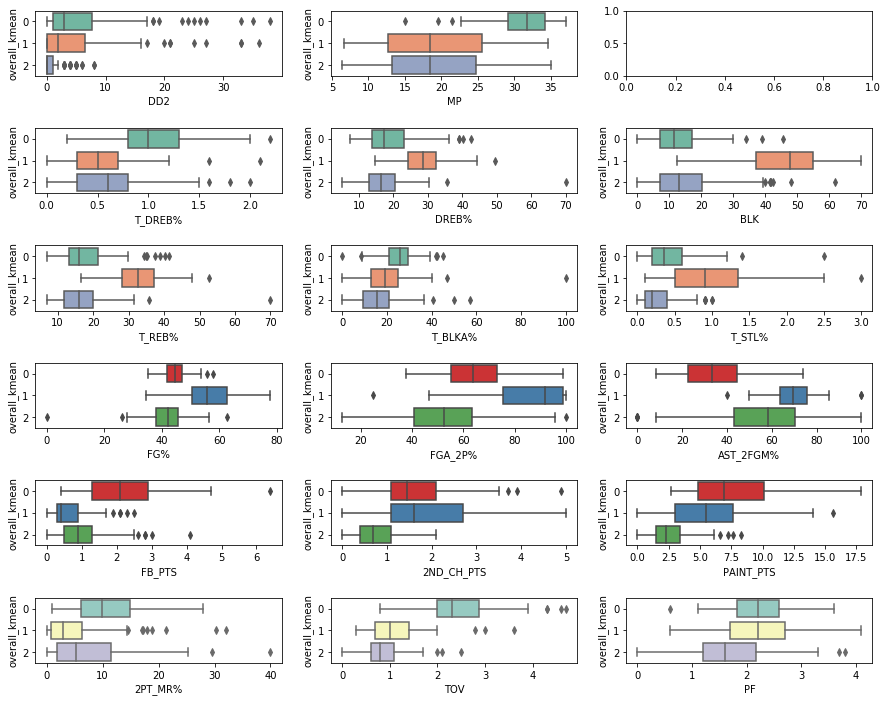

In [7]:
fig, axes = plt.subplots(6, 3, figsize = (15, 12))
plt.subplots_adjust(hspace = 0.8)
sns.boxplot(x = 'DD2', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[0,0])
sns.boxplot(x = 'MP', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[0,1])
#---------------------- line 2
sns.boxplot(x = 'T_DREB%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[1,0])
sns.boxplot(x = 'DREB%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[1,1])
sns.boxplot(x = 'BLK', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[1,2])
#---------------------- line 3
sns.boxplot(x = 'T_REB%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[2,0])
sns.boxplot(x = 'T_BLKA%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[2,1])
sns.boxplot(x = 'T_STL%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[2,2])
#---------------------- line 4
sns.boxplot(x = 'FG%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[3,0])
sns.boxplot(x = 'FGA_2P%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[3,1])
sns.boxplot(x = 'AST_2FGM%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[3,2])
#---------------------- line 5
sns.boxplot(x = 'FB_PTS', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[4,0])
sns.boxplot(x = '2ND_CH_PTS', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[4,1])
sns.boxplot(x = 'PAINT_PTS', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[4,2])
#---------------------- line 5
sns.boxplot(x = '2PT_MR%', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set3", ax = axes[5,0])
sns.boxplot(x = 'TOV', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set3", ax = axes[5,1])
sns.boxplot(x = 'PF', y = 'overall_kmean', data = nba_stats, orient="h", palette="Set3", ax = axes[5,2])

In [8]:
print(f'There are {len(overall_cluster0)} players in Cluster 0')
print(f'There are {len(overall_cluster1)} players in Cluster 1')
print(f'There are {len(overall_cluster2)} players in Cluster 2')

There are 94 players in Cluster 0
There are 87 players in Cluster 1
There are 246 players in Cluster 2
